# Data Analysis

### Given:
1. Calcite - 
    K_Ca = 71 GPa,
    G_Ca = 30 GPa,
    d_Ca = 2.71 g/cc

2. Quartz - 
    K_Qz = 36.6 GPa,
    G_Qz = 45 GPa,
    d_Qz = 2.65 g/cc

3. Clay - 
    K_Cl = 25 GPa,
    G_Cl = 9 GPa,
    d_Cl = 2.55 g/cc

4. Fluid - 
    K_fl = 2.25 GPa,
    G_fl = 0.00 GPa,
    d_fl = 1.00 g/cc


In [1]:
# Calcite
K_Ca = 71  # GPa
G_Ca = 30  # GPa
d_Ca = 2.71  # g/cc

# Quartz
K_Qz = 36.6  # GPa
G_Qz = 45  # GPa
d_Qz = 2.65  # g/cc

# Clay
K_Cl = 25  # GPa
G_Cl = 9  # GPa
d_Cl = 2.55  # g/cc

# Fluid
K_fl = 2.25  # GPa
G_fl = 0.00  # GPa
d_fl = 1.00  # g/cc

In [2]:
# ignore all the warnings
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ignore all the warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the Excel file into a Pandas DataFrame
file_path = 'ChalkData_ClassTutorial_cleaned.xlsx'  # Replace with the path to your .xlsx file
df = pd.read_excel(file_path)

# drop 0th row (which is units header)
df = df.drop(index=[0])
df.head(5)

,Well,Formation,Depth_in_metres,Depth_in_feets,Porosity,Grain_density,Bulk_density_dry,Bulk_density_saturated,Vp_vertical_dry,Vs_vertical_dry,Vp_vertical_wet,Vs_vertical_wet,Carbonate_content,Quartz_content,Clay_content,Texture
1,Nana,chalk,2108.8,6918.9728,28.6,2.703081,1.93,2.23,3.05,1.93,3.15,1.68,84,14.8,1.2,w
2,Nana,chalk,2110,6922.91,33,2.731343,1.83,2.14,2.88,1.81,2.55,1.465,87.4,8.4,4.2,m
3,Nana,chalk,2110,6922.91,32.6,2.715134,1.83,2.17,2.76,1.75,2.89,1.47,87.3,11.2,0.8,m
4,Nana,chalk,2117.8,6948.5018,26,2.689189,1.99,2.24,3.345,2.075,3.245,1.74,93.3,4.466667,2.233333,m
5,Nana,chalk,2117.8,6948.5018,26.3,2.713704,2,2.27,3.23,2.03,3.35,1.81,93.3,4.9,1.1,m


In [5]:
df.tail(5)

,Well,Formation,Depth_in_metres,Depth_in_feets,Porosity,Grain_density,Bulk_density_dry,Bulk_density_saturated,Vp_vertical_dry,Vs_vertical_dry,Vp_vertical_wet,Vs_vertical_wet,Carbonate_content,Quartz_content,Clay_content,Texture
98,M030,Tor,0,0,29.7,2.71,1.90513,2.20213,3.14,1.96,3.23,1.74,98.4,2,1,M
99,M031,Tor,0,0,31.5,2.71,1.85635,2.17135,2.84,1.84,2.97,1.6,98.9,2,1,M
100,M032,Tor,0,0,28.8,2.71,1.92952,2.21752,3.21,2,3.27,1.75,97.1,3,1,M
101,M035,Tor,0,0,32.3,2.71,1.83467,2.15767,2.84,1.81,2.95,1.57,97.9,2,1,M
102,M037,Tor,0,0,31.7,2.71,1.85093,2.16793,2.96,1.85,3.11,1.66,98,3,1,M


In [6]:
# print size of the dataframe
print(df.shape)

(102, 16)


In [7]:
# create a new dataframe to store the calculated results
df_results = pd.DataFrame()
df_results['Well'] = df['Well'].astype(str)
df_results['Formation'] = df['Formation'].astype(str)
df_results['Depth'] = df['Depth_in_feets'].astype(float)
df_results['Bulk_density_dry'] = df['Bulk_density_dry'].astype(float)
df_results['Bulk_density_saturated'] = df['Bulk_density_saturated'].astype(float)
df_results['Vp_vertical_dry'] = df['Vp_vertical_dry'].astype(float)
df_results['Vp_vertical_saturated'] = df['Vp_vertical_wet'].astype(float)
df_results['Vs_vertical_dry'] = df['Vs_vertical_dry'].astype(float)
df_results['Vs_vertical_saturated'] = df['Vs_vertical_wet'].astype(float)


In [8]:
import numpy as np

# Convert each column to a numpy array and store it in variables with the same name as the column
Well = df['Well'].to_numpy()
Formation = df['Formation'].to_numpy()
Depth_in_metres = df['Depth_in_metres'].to_numpy()
Depth_in_feets = df['Depth_in_feets'].to_numpy()
Porosity = df['Porosity'].to_numpy()
Grain_density = df['Grain_density'].to_numpy()
Bulk_density_dry = df['Bulk_density_dry'].to_numpy()
Bulk_density_saturated = df['Bulk_density_saturated'].to_numpy()
Vp_vertical_dry = df['Vp_vertical_dry'].to_numpy()
Vs_vertical_dry = df['Vs_vertical_dry'].to_numpy()
Vp_vertical_wet = df['Vp_vertical_wet'].to_numpy()
Vs_vertical_wet = df['Vs_vertical_wet'].to_numpy()
Carbonate_content = df['Carbonate_content'].to_numpy()
Quartz_content = df['Quartz_content'].to_numpy()
Clay_content = df['Clay_content'].to_numpy()
Texture = df['Texture'].to_numpy()

In [9]:
Depth_in_feets = Depth_in_feets[(Depth_in_feets !=0)]
Depth_in_metres = Depth_in_metres[(Depth_in_metres !=0)]

In [10]:
Total_content = Carbonate_content + Quartz_content + Clay_content
Carbonate_content = Carbonate_content / Total_content
Quartz_content = Quartz_content / Total_content
Clay_content = Clay_content / Total_content

In [11]:
df_results['Carbonate_content'] = Carbonate_content*100
df_results['Quartz_content'] = Quartz_content*100
df_results['Clay_content'] = Clay_content*100


In [12]:
# Save the new DataFrame to a excel file
output_file_path = 'ChalkData_ClassTutorial_results.xlsx'  # Replace with the desired output file path
# df_results.to_excel(output_file_path, index=False)  # Save the DataFrame to an Excel file

In [13]:
def plot_properties_vs_depth(depth, property_values, property_name, units, ylimit=[10500,6500], xlimit=None):
    # take property values upto the given depth
    property_values = property_values[:len(depth)]

    
    formation_data = df['Formation'].to_numpy()
    formation_data = formation_data[:len(depth)]

    # Define unique formations and assign markers and colors
    formations = df['Formation'].unique()
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'd']
    colors = plt.cm.tab10.colors  # Use a colormap for colors

    plt.figure(figsize=(6, 8))

    # Plot each formation with a unique marker and color
    for i, formation in enumerate(formations):
        # formation_indices = df['Formation'] == formation
        formation_indices = formation_data == formation
        plt.scatter(
            property_values[formation_indices],
            depth[formation_indices],
            label=formation,
            marker=markers[i % len(markers)],
            color=colors[i % len(colors)],
            alpha=0.7,
            s=20
        )

    plt.gca().invert_yaxis()

    # Set x and y limits if provided
    if xlimit:
        plt.xlim(xlimit[0], xlimit[1])
    if ylimit:
        plt.ylim(ylimit[0], ylimit[1])

    # Add labels, title, legend, and grid
    plt.ylabel('Depth (ft)')
    plt.xlabel(f'{property_name} ({units})')
    plt.title(f'{property_name} vs Depth')
    plt.legend(title='Formation')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [14]:
def crossplot(property1, property2, title, xlabel, ylabel, xlimit=None, ylimit=None):
    """
    Create a crossplot of two properties.
    
    Parameters:
    - property1: First property to plot on x-axis
    - property2: Second property to plot on y-axis
    - title: Title of the plot
    - xlabel: Label for x-axis
    - ylabel: Label for y-axis
    """

    # Define unique formations and assign markers and colors
    formations = df['Formation'].unique()
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'd']
    colors = plt.cm.tab10.colors  # Use a colormap for colors

    plt.figure(figsize=(7, 6))

    # Plot each formation with a unique marker and color
    for i, formation in enumerate(formations):
        formation_indices = df['Formation'] == formation
        plt.scatter(
            property1[formation_indices],
            property2[formation_indices],
            label=formation,
            marker=markers[i % len(markers)],
            color=colors[i % len(colors)],
            alpha=0.7,
            s=20  # Adjust size of markers
        )
    
    # Plot y=x line
    max_val = max(max(property1), max(property2))
    min_val = min(min(property1), min(property2))

    # Set x and y limits if provided
    if xlimit:
        plt.xlim(xlimit[0], xlimit[1])
        min_val = min(min_val, xlimit[0])
        max_val = max(max_val, xlimit[1])
    if ylimit:
        plt.ylim(ylimit[0], ylimit[1])
        min_val = min(min_val, ylimit[0])
        max_val = max(max_val, ylimit[1])


    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y=x Line')
    
    # Add labels, title, and legend

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    
    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

### Ques 1
⁠Calculate porosity using bulk density, grain density, and fluid density. (Use mineral fraction information for calculating exact grain density) otherwise use the grain density of the dominant mineral.


In [15]:
Matrix_density_calculated = (
    Carbonate_content * d_Ca +
    Quartz_content * d_Qz +
    Clay_content * d_Cl 
)

In [16]:
Fluid_density = d_fl

In [17]:
Porosity_calculated = (
    (Bulk_density_saturated - Matrix_density_calculated) /
    (Fluid_density - Matrix_density_calculated)
    * 100
)

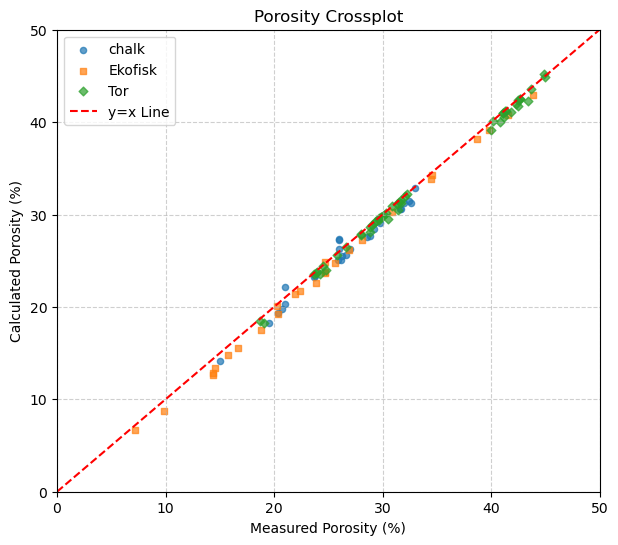

In [18]:
crossplot(
    Porosity,
    Porosity_calculated,
    'Porosity Crossplot',
    'Measured Porosity (%)',
    'Calculated Porosity (%)',
    xlimit=(0, 50),
    ylimit=(0, 50)
)

In [19]:
# store the calculate porosity in a new dataframe
df_results['Porosity_calculated'] = Porosity_calculated

### Ques 2.⁠ 
⁠Calculate Bulk modulus: dry and saturated, Shear Modulus: dry and saturated, Poisson's Ratio: Dry and Saturated


In [20]:
Bulk_modulus_dry_calculated = ((Vp_vertical_dry ** 2) - (4/3) * (Vs_vertical_dry ** 2)) * Bulk_density_dry
Shear_modulus_dry_calculated = (Vs_vertical_dry ** 2) * Bulk_density_dry
Bulk_modulus_saturated_calculated = ((Vp_vertical_wet ** 2) - (4/3) * (Vs_vertical_wet ** 2)) * Bulk_density_saturated
Shear_modulus_saturated_calculated = (Vs_vertical_wet ** 2) * Bulk_density_saturated

Poisson_ratio_dry_calculated = (
    ((Vp_vertical_dry ** 2) - (2 * Vs_vertical_dry ** 2))
    / (2 * (Vp_vertical_dry ** 2) - (2 * Vs_vertical_dry ** 2))
)
Poisson_ratio_saturated_calculated = (
    ((Vp_vertical_wet ** 2) - (2 * Vs_vertical_wet ** 2))
    / (2 * (Vp_vertical_wet ** 2) - (2 * Vs_vertical_wet ** 2))
)

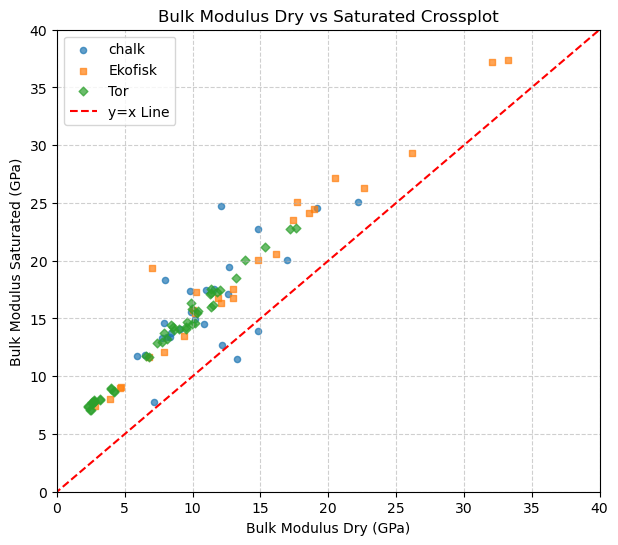

In [21]:
crossplot(
    Bulk_modulus_dry_calculated,
    Bulk_modulus_saturated_calculated,
    'Bulk Modulus Dry vs Saturated Crossplot',
    'Bulk Modulus Dry (GPa)',
    'Bulk Modulus Saturated (GPa)',
    xlimit=(0, 40),
    ylimit=(0, 40)
)

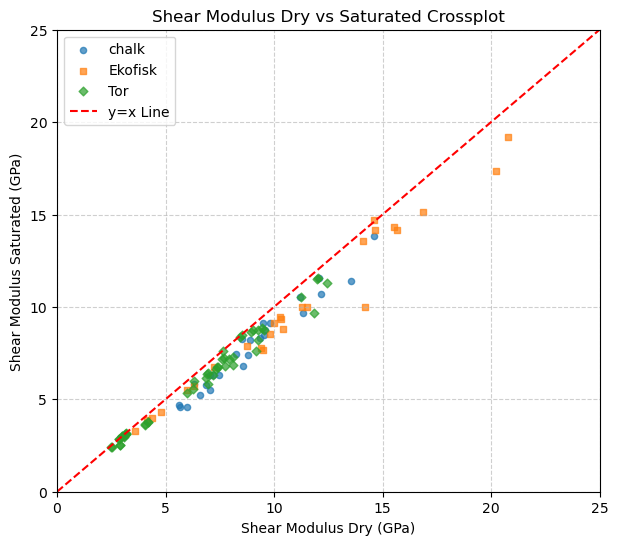

In [22]:
crossplot(
    Shear_modulus_dry_calculated,
    Shear_modulus_saturated_calculated,
    'Shear Modulus Dry vs Saturated Crossplot',
    'Shear Modulus Dry (GPa)',
    'Shear Modulus Saturated (GPa)',
    xlimit=(0, 25),
    ylimit=(0, 25)
)

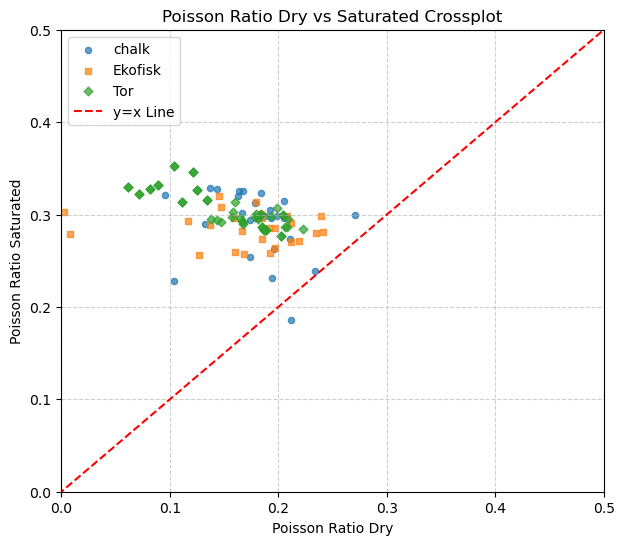

In [23]:
crossplot(Poisson_ratio_dry_calculated,
    Poisson_ratio_saturated_calculated,
    'Poisson Ratio Dry vs Saturated Crossplot',
    'Poisson Ratio Dry',
    'Poisson Ratio Saturated',
    xlimit=(0,0.5),
    ylimit=(0,0.5)
)

In [24]:
df_results['Bulk_modulus_dry_calculated'] = Bulk_modulus_dry_calculated
df_results['Shear_modulus_dry_calculated'] = Shear_modulus_dry_calculated
df_results['Bulk_modulus_saturated_calculated'] = Bulk_modulus_saturated_calculated
df_results['Shear_modulus_saturated_calculated'] = Shear_modulus_saturated_calculated
df_results['Poisson_ratio_dry_calculated'] = Poisson_ratio_dry_calculated
df_results['Poisson_ratio_saturated_calculated'] = Poisson_ratio_saturated_calculated

### Ques 3
Calculate Biot's coefficient using a critical porosity (PHIc) of 50%


In [25]:
Critical_porosity = 50  # in %

In [26]:
Biots_coefficient_calculated = np.minimum(1, Porosity_calculated / Critical_porosity)

In [27]:
df_results['Biots_coefficient_calculated'] = Biots_coefficient_calculated

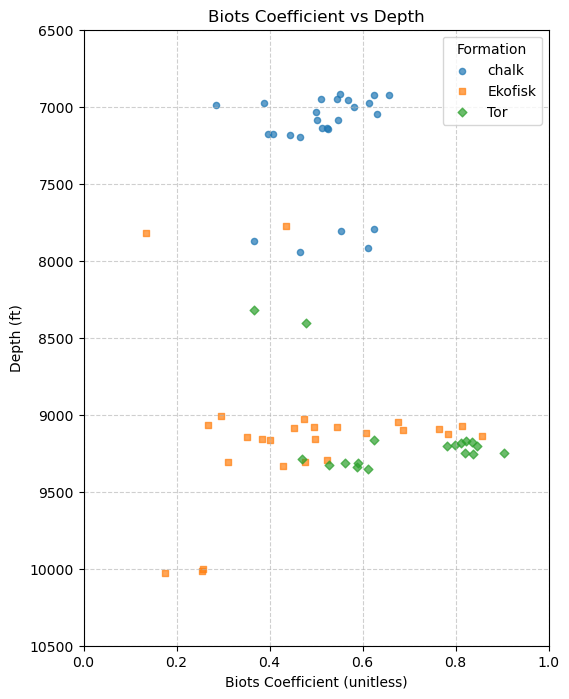

In [28]:
plot_properties_vs_depth(
    Depth_in_feets,
    Biots_coefficient_calculated,
    'Biots Coefficient',
    'unitless',
    ylimit=[10500, 6500],
    xlimit=[0, 1]
)

### Ques 4

⁠Calculate Vertical Overburden Stress, Terzagh's Stress (Differential), and Biot's Stress (Effective).


In [29]:
# given
avg_overburden_density = 2.0  # g/cc
depth = Depth_in_feets[0] # in feet

In [30]:
# unit of overburden stress will be in psi (pounds per square inch)
vertical_overburden_stress_upto_mudline = 0.433 * avg_overburden_density * depth

In [31]:
# vertical overburden stress
sigma_v = vertical_overburden_stress_upto_mudline   
vertical_overburden_stress = [sigma_v]

# calculate vertical overburden stress for each depth
for i in range(1, len(Depth_in_feets)):
    if Depth_in_feets[i] == 0:
        break
    sigma_v += 0.433 * Bulk_density_saturated[i-1] * (Depth_in_feets[i] - Depth_in_feets[i-1])
    vertical_overburden_stress.append(sigma_v)

vertical_overburden_stress = np.array(vertical_overburden_stress, dtype=float)

# vertical differential stress
vertical_differential_stress = vertical_overburden_stress - (0.433 * Fluid_density * Depth_in_feets)

# vertical Effective stress
vertical_effective_stress = vertical_overburden_stress - (Biots_coefficient_calculated[:len(Depth_in_feets)] * 0.433 * Fluid_density * Depth_in_feets)

In [32]:
df_results['Vertical_overburden_stress'] = np.append(vertical_overburden_stress, [np.nan] * (len(df_results) - len(vertical_overburden_stress)))
df_results['Vertical_differential_stress'] = np.append(vertical_differential_stress, [np.nan] * (len(df_results) - len(vertical_differential_stress)))
df_results['Vertical_effective_stress'] = np.append(vertical_effective_stress, [np.nan] * (len(df_results) - len(vertical_effective_stress)))

In [33]:
vertical_overburden_stress = vertical_overburden_stress/1000
vertical_differential_stress = vertical_differential_stress/1000
vertical_effective_stress = vertical_effective_stress/1000 

### Ques 5
⁠Calculate the upper and lower bound for the given system using both Voigt-Reuss and Hashin-Shtrikman Method. Use hint from Ques no. 1.


In [34]:
porosities = np.arange(0.0, 1.01, 0.01)

In [35]:
relative_porosities = np.minimum(porosities/(Critical_porosity/100), 1.0)

In [36]:
V_Ca = np.mean(Carbonate_content)
V_Qz = np.mean(Quartz_content)
V_Cl = np.mean(Clay_content)

total = V_Ca + V_Qz + V_Cl

V_Ca = V_Ca / total
V_Qz = V_Qz / total
V_Cl = V_Cl / total

#### Voight and Reuss Bounds

In [37]:
Kv_min = V_Ca*K_Ca + V_Qz*K_Qz + V_Cl*K_Cl
Gv_min = V_Ca*G_Ca + V_Qz*G_Qz + V_Cl*G_Cl

Kr_min = 1/(V_Ca/K_Ca + V_Qz/K_Qz + V_Cl/K_Cl)
Gr_min = 1/(V_Ca/G_Ca + V_Qz/G_Qz + V_Cl/G_Cl)

Kmin = round((Kv_min + Kr_min)/2, 2)
Gmin = round((Gv_min + Gr_min)/2, 2)

Kfl = K_fl
Gfl = G_fl

In [38]:
Kv = Kmin*(1 - porosities) + Kfl*porosities
Gv = Gmin*(1 - porosities) + Gfl*porosities

Kr = 1/((1-porosities)/Kmin  + porosities/Kfl)
Gr = np.zeros_like(Kr)

Kvrh = (Kv + Kr)/2
Gvrh = (Gv + Gr)/2

In [39]:
Kv_mod = Kmin*(1 - relative_porosities) + Kfl*relative_porosities
Gv_mod = Gmin*(1 - relative_porosities) + Gfl*relative_porosities

Kr_mod = 1/((1-relative_porosities)/Kmin  + relative_porosities/Kfl)
Gr_mod = np.zeros_like(Kr_mod)

Kvrh_mod = (Kv_mod + Kr_mod)/2
Gvrh_mod = (Gv_mod + Gr_mod)/2

#### Hashin-Shtrikman Bound

In [40]:
K1 = Kmin
K2 = Kfl
G1 = Gmin
G2 = Gfl
f2 = porosities
f1 = 1 - f2

In [41]:
KHS_upper = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_upper = G1 + (f2 / (1/(G2 - G1) + 2*f1*(K1 + 2*G1)/(5*G1*(K1 + 4/3*G1))))

In [42]:
f2_mod = relative_porosities
f1_mod = 1 - f2_mod

In [43]:
KHS_upper_mod = K1 + (f2_mod / (1/(K2 - K1) + f1_mod/(K1 + 4/3*G1)))

GHS_upper_mod = G1 + (f2_mod / (1/(G2 - G1) + 2*f1_mod*(K1 + 2*G1)/(5*G1*(K1 + 4/3*G1))))

In [44]:
K1, K2 = K2, K1
G1, G2 = G2, G1
f1, f2 = f2, f1
f1_mod, f2_mod = f2_mod, f1_mod

In [45]:
KHS_lower = K1 + (f2 / (1/(K2 - K1) + f1/(K1 + 4/3*G1)))

GHS_lower = np.zeros_like(KHS_lower)

In [46]:
KHS_lower_mod = K1 + (f2_mod / (1/(K2 - K1) + f1_mod/(K1 + 4/3*G1)))
GHS_lower_mod = np.zeros_like(KHS_lower_mod)

In [47]:
KHS_avg = (KHS_upper + KHS_lower)/2
GHS_avg = (GHS_upper + GHS_lower)/2
KHS_avg_mod = (KHS_upper_mod + KHS_lower_mod)/2
GHS_avg_mod = (GHS_upper_mod + GHS_lower_mod)/2

### Ques 6
⁠Calculate Gassmann's response for each of the samples using the given information about dry state of the samples, and the mineral fractions. Use the same fluid as in point Ques.1. 

In [48]:
K_voight = (K_Ca * Carbonate_content +
            K_Qz * Quartz_content +
            K_Cl * Clay_content) 

K_reuss = 1 / ( Carbonate_content / K_Ca +
                Quartz_content / K_Qz +
                Clay_content / K_Cl)

K_mineral_voigt_reuss_calculated = (K_voight + K_reuss) / 2

In [49]:
K_matrix = K_mineral_voigt_reuss_calculated
K_dry = Bulk_modulus_dry_calculated
# phi = Porosity_calculated / 100
phi = Porosity_calculated / Critical_porosity


In [50]:
# Gassmann's equation for Bulk modulus of saturated rock
Gassmanns_Bulk_modulus_saturated_calculated = K_dry + (((1 - (K_dry/K_matrix))**2) / ((phi/K_fl) + ((1 - phi)/K_matrix) + (K_dry/(K_matrix**2))))

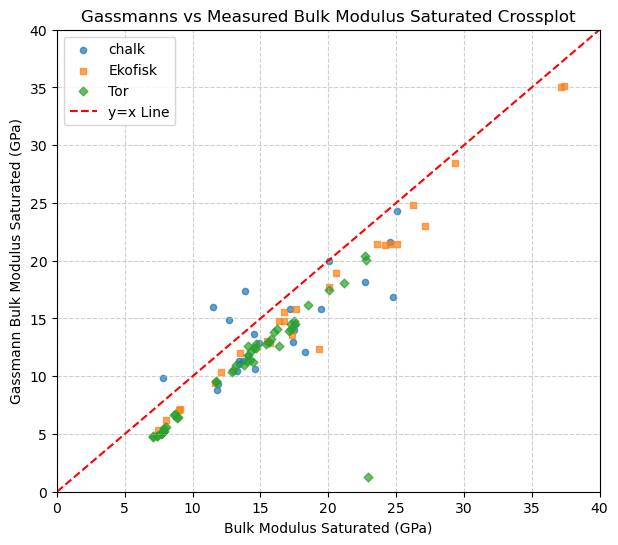

In [51]:
crossplot(Bulk_modulus_saturated_calculated,
        Gassmanns_Bulk_modulus_saturated_calculated,
        'Gassmanns vs Measured Bulk Modulus Saturated Crossplot',
        'Bulk Modulus Saturated (GPa)',
        'Gassmann Bulk Modulus Saturated (GPa)',
        xlimit=(0, 40),
        ylimit=(0, 40)
)

### Ques 7
Recalculate the compressive- and shear- wave velocity of the samples using Gassmann's output 

In [52]:
# Vp and Vs for the saturated rock using Gassmann's K_saturated
K_sat = np.array(pd.to_numeric(Gassmanns_Bulk_modulus_saturated_calculated), dtype=float)

# using poissons ratio of the saturated rock
Poisson_ratio_saturated_calculated = np.array(pd.to_numeric(Poisson_ratio_saturated_calculated), dtype=float)
G_sat = 3 * K_sat * (1 - 2 * Poisson_ratio_saturated_calculated) / (2 * (1 + Poisson_ratio_saturated_calculated))

# assuming Gassmanns thoery, G_sat = G_dry
G_dry = G_sat

# using poissons ratio of the dry rock
Poisson_ratio_dry_calculated = np.array(pd.to_numeric(Poisson_ratio_dry_calculated), dtype=float)
K_dry = 2 * G_dry * (1 + Poisson_ratio_dry_calculated) / (3 * (1 - 2 * Poisson_ratio_dry_calculated))



Bulk_density_saturated = np.array(pd.to_numeric(Bulk_density_saturated), dtype=float)
Bulk_density_dry = np.array(pd.to_numeric(Bulk_density_dry), dtype=float)

Vp_vertical_wet_Gassmanns = np.sqrt((K_sat + (4/3) * G_sat) / Bulk_density_saturated)
Vs_vertical_wet_Gassmanns = np.sqrt(G_sat / Bulk_density_saturated)

Vp_vertical_dry_Gassmanns = np.sqrt((K_dry + (4/3) * G_dry) / Bulk_density_dry)
Vs_vertical_dry_Gassmanns = np.sqrt(G_dry / Bulk_density_dry)


In [53]:
df_results['Bulk_modulus_saturated_Gassmanns'] = K_sat
df_results['Shear_modulus_saturated_Gassmanns'] = G_sat
df_results['Bulk_modulus_dry_Gassmanns'] = K_dry
df_results['Shear_modulus_dry_Gassmanns'] = G_dry

In [54]:
df_results['Vp_vertical_saturated_Gassmanns'] = Vp_vertical_wet_Gassmanns
df_results['Vs_vertical_saturated_Gassmanns'] = Vs_vertical_wet_Gassmanns
df_results['Vp_vertical_dry_Gassmanns'] = Vp_vertical_dry_Gassmanns
df_results['Vs_vertical_dry_Gassmanns'] = Vs_vertical_dry_Gassmanns

### Ques 8
Plot the porosity trend with depth


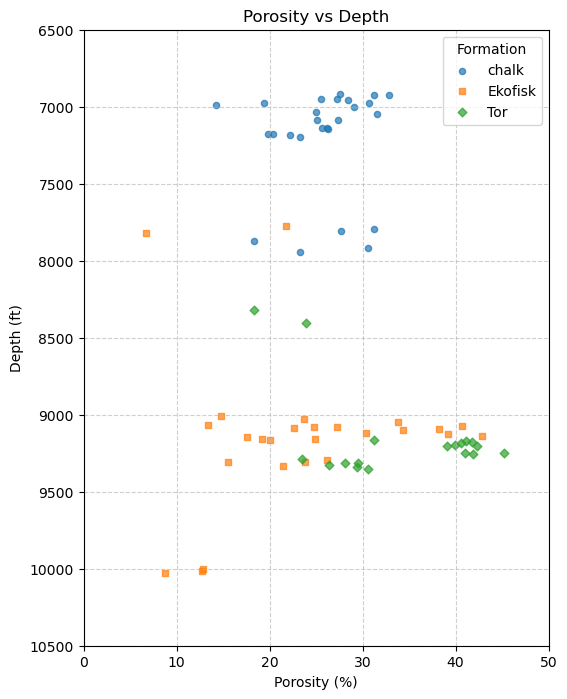

In [55]:
plot_properties_vs_depth(
    Depth_in_feets,
    Porosity_calculated,
    'Porosity',
    '%',
    xlimit=[0, 50],
)


### Ques 9
Plot the Stress trend with depth


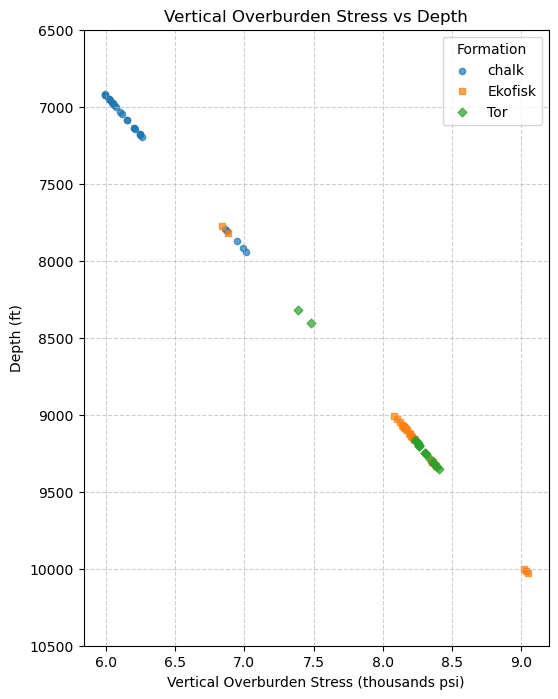

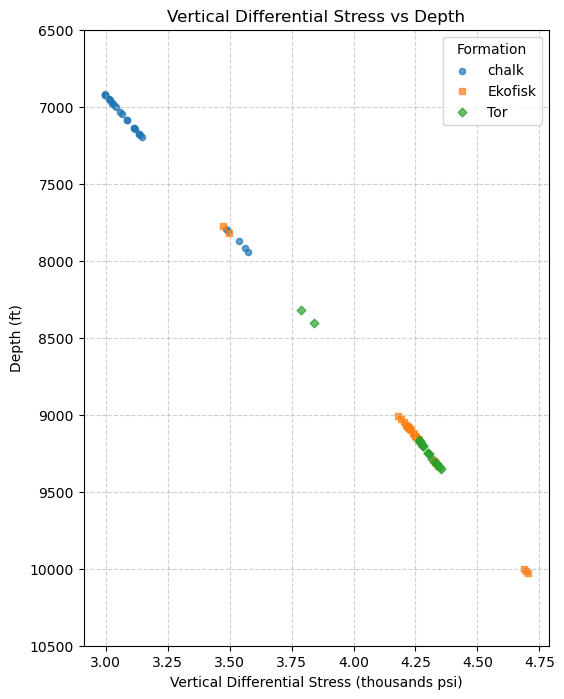

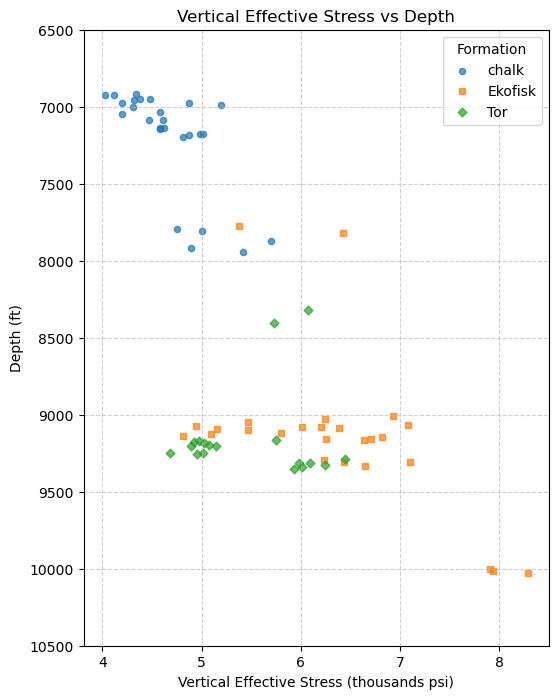

In [56]:
plot_properties_vs_depth(
    Depth_in_feets,
    vertical_overburden_stress,
    'Vertical Overburden Stress',
    'thousands psi',
)
plot_properties_vs_depth(
    Depth_in_feets,
    vertical_differential_stress,
    'Vertical Differential Stress',
    'thousands psi',
)
plot_properties_vs_depth(
    Depth_in_feets,
    vertical_effective_stress,
    'Vertical Effective Stress',
    'thousands psi',
)

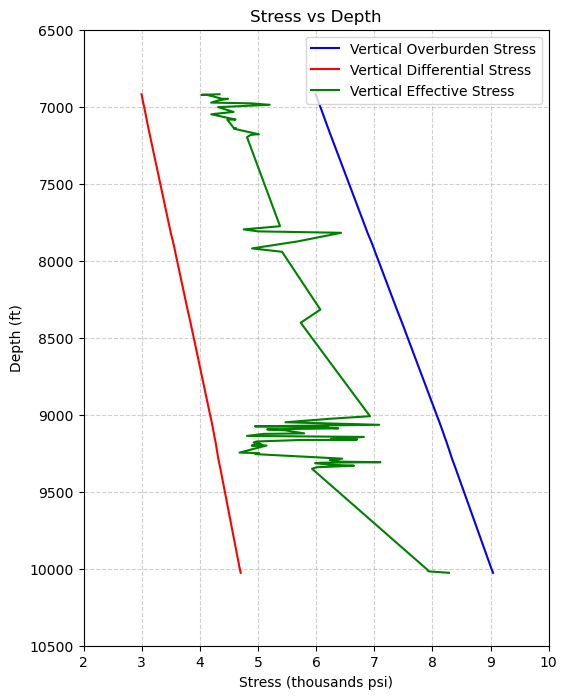

In [57]:
# plot all 3 stresses in one plot with depth in y-axis
plt.figure(figsize=(6, 8))
plt.plot(vertical_overburden_stress, Depth_in_feets, label='Vertical Overburden Stress', color='blue')
plt.plot(vertical_differential_stress, Depth_in_feets, label='Vertical Differential Stress', color='red')
plt.plot(vertical_effective_stress, Depth_in_feets, label='Vertical Effective Stress', color='green')
plt.gca().invert_yaxis()
plt.xlim(2, 10)
plt.ylim(10500, 6500)
plt.xlabel('Stress (thousands psi)')
plt.ylabel('Depth (ft)')
plt.title('Stress vs Depth')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Ques 10
⁠Plot the Modulus trend with depth

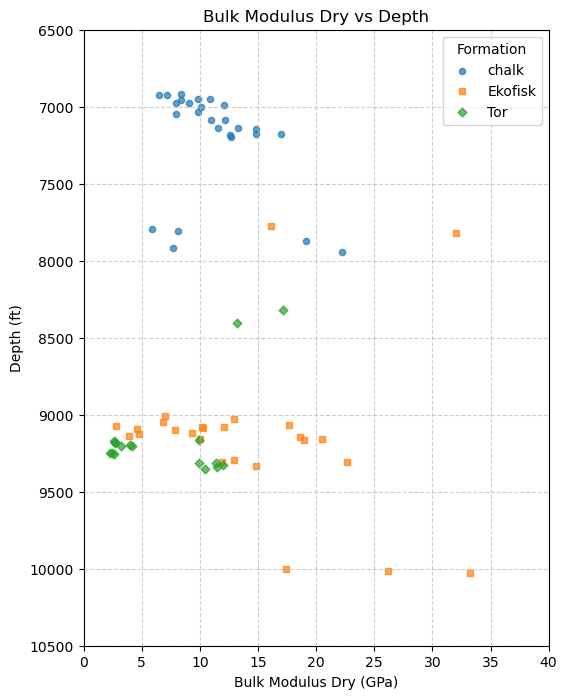

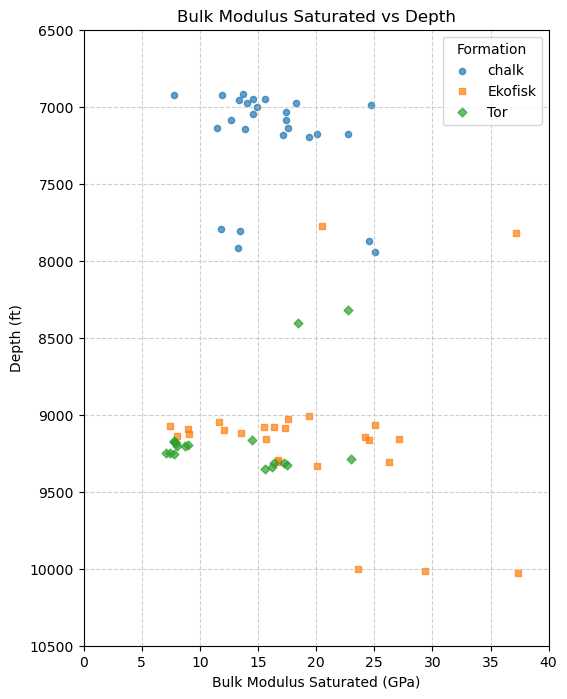

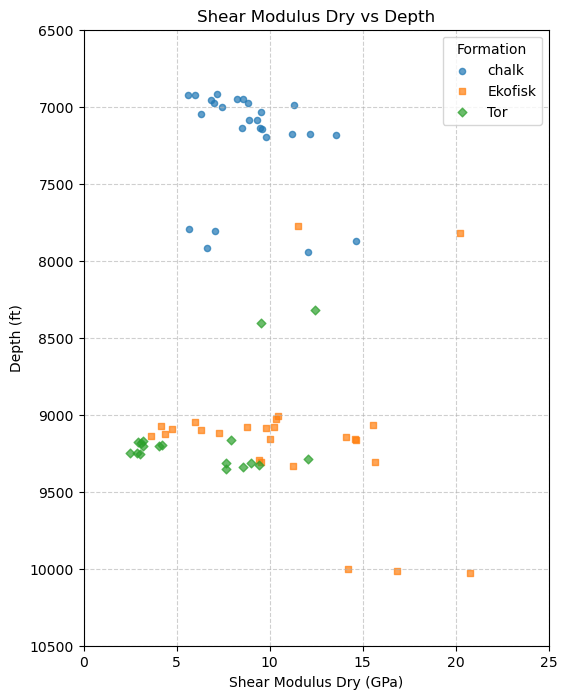

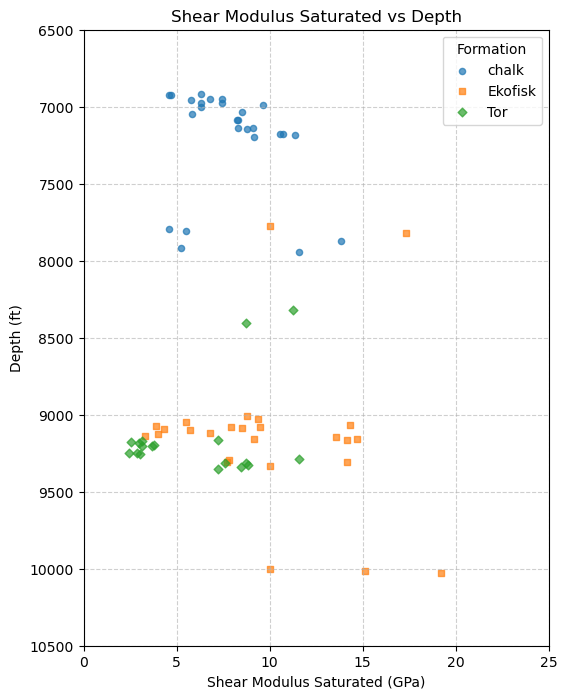

In [58]:
plot_properties_vs_depth(
    Depth_in_feets,
    Bulk_modulus_dry_calculated,
    'Bulk Modulus Dry',
    'GPa',
    xlimit=[0, 40],
)
plot_properties_vs_depth(
    Depth_in_feets,
    Bulk_modulus_saturated_calculated,
    'Bulk Modulus Saturated',
    'GPa',
    xlimit=[0, 40],
)
plot_properties_vs_depth(
    Depth_in_feets,
    Shear_modulus_dry_calculated,
    'Shear Modulus Dry',
    'GPa',
    xlimit=[0, 25],
)
plot_properties_vs_depth(
    Depth_in_feets,
    Shear_modulus_saturated_calculated,
    'Shear Modulus Saturated',
    'GPa',
    xlimit=[0, 25],
)

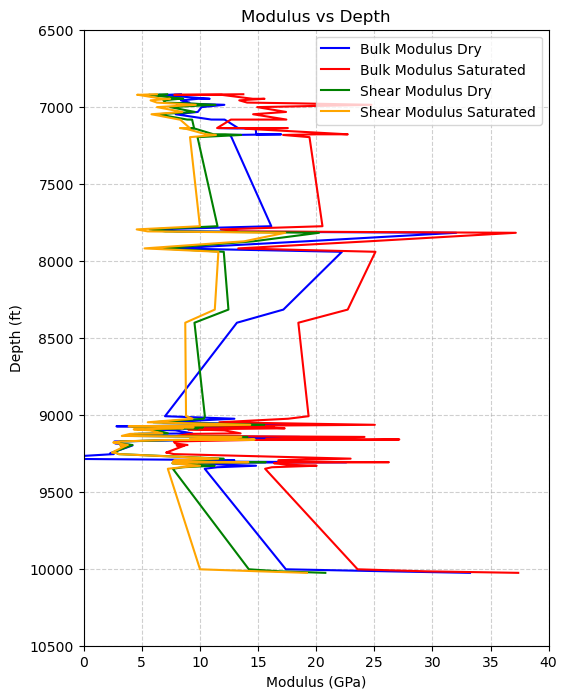

In [59]:
# plot bulk and shear modulus in one plot with depth in y-axis
plt.figure(figsize=(6, 8))
plt.plot(Bulk_modulus_dry_calculated[:len(Depth_in_feets)], Depth_in_feets, label='Bulk Modulus Dry', color='blue')
plt.plot(Bulk_modulus_saturated_calculated[:len(Depth_in_feets)], Depth_in_feets, label='Bulk Modulus Saturated', color='red')
plt.plot(Shear_modulus_dry_calculated[:len(Depth_in_feets)], Depth_in_feets, label='Shear Modulus Dry', color='green')
plt.plot(Shear_modulus_saturated_calculated[:len(Depth_in_feets)], Depth_in_feets, label='Shear Modulus Saturated', color='orange')
plt.gca().invert_yaxis()
plt.xlim(0, 40)
plt.ylim(10500, 6500)
plt.xlabel('Modulus (GPa)')
plt.ylabel('Depth (ft)')
plt.title('Modulus vs Depth')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Ques 11
Plot the normal V-R and the normal Ha-Sh bounds on the same template


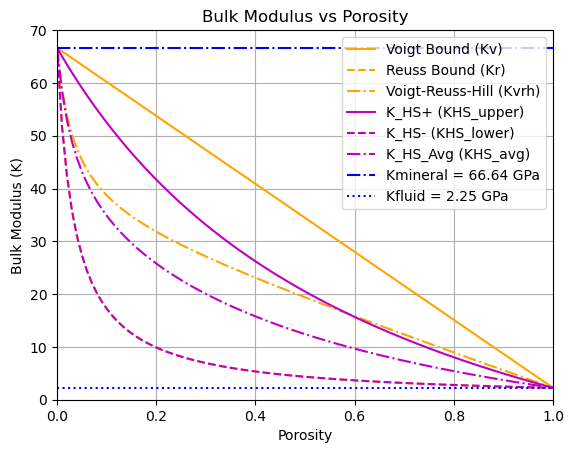

In [60]:
# Plotting the bulk modulus values
plt.plot(porosities, Kv, label='Voigt Bound (Kv)', linestyle='-', color='orange')
plt.plot(porosities, Kr, label='Reuss Bound (Kr)', linestyle='--', color='orange')
plt.plot(porosities, Kvrh, label='Voigt-Reuss-Hill (Kvrh)', linestyle='-.', color='orange')
plt.plot(porosities, KHS_upper, label='K_HS+ (KHS_upper)', linestyle='-', color='m')
plt.plot(porosities, KHS_lower, label='K_HS- (KHS_lower)', linestyle='--', color='m')
plt.plot(porosities, KHS_avg, label='K_HS_Avg (KHS_avg)', linestyle='-.', color='m')

# Mark and indicate Kmin and Gfl
plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')


# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Bulk Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

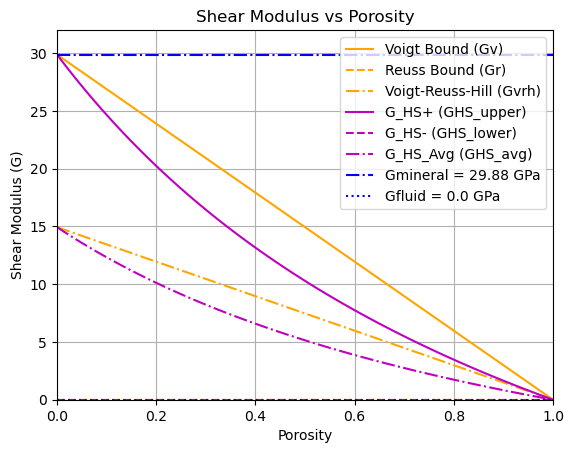

In [61]:
# Plotting the shear modulus values
plt.plot(porosities, Gv, label='Voigt Bound (Gv)', linestyle='-', color='orange')
plt.plot(porosities, Gr, label='Reuss Bound (Gr)', linestyle='--', color='orange')
plt.plot(porosities, Gvrh, label='Voigt-Reuss-Hill (Gvrh)', linestyle='-.', color='orange')
plt.plot(porosities, GHS_upper, label='G_HS+ (GHS_upper)', linestyle='-', color='m')
plt.plot(porosities, GHS_lower, label='G_HS- (GHS_lower)', linestyle='--', color='m')
plt.plot(porosities, GHS_avg, label='G_HS_Avg (GHS_avg)', linestyle='-.', color='m')

# Mark and indicate Gmin and Gfl
plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 32)
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Shear Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

### Ques 12
Plot the normal V-R and Ha-Sh bounds with their modified bounds.

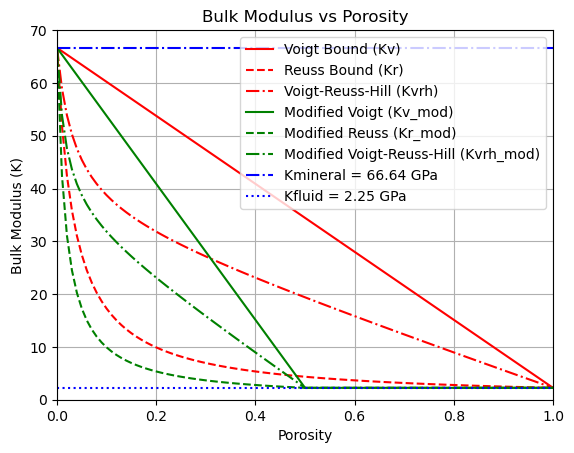

In [62]:
# Plotting the bulk modulus values
plt.plot(porosities, Kv, label='Voigt Bound (Kv)', linestyle='-', color='red')
plt.plot(porosities, Kr, label='Reuss Bound (Kr)', linestyle='--', color='red')
plt.plot(porosities, Kvrh, label='Voigt-Reuss-Hill (Kvrh)', linestyle='-.', color='red')
plt.plot(porosities, Kv_mod, label='Modified Voigt (Kv_mod)', linestyle='-', color='green')
plt.plot(porosities, Kr_mod, label='Modified Reuss (Kr_mod)', linestyle='--', color='green')
plt.plot(porosities, Kvrh_mod, label='Modified Voigt-Reuss-Hill (Kvrh_mod)', linestyle='-.', color='green')

# Mark and indicate Kmin and Gfl
plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')


# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Bulk Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

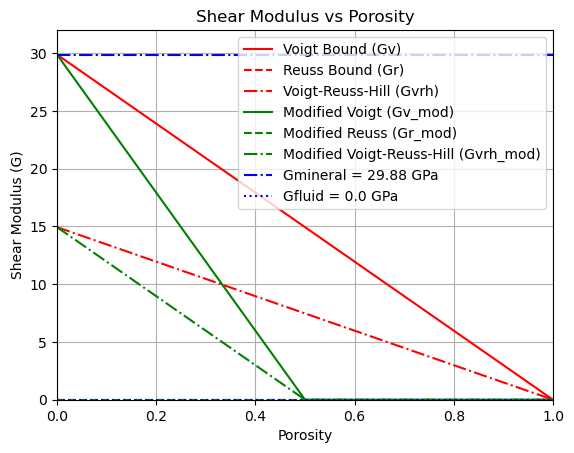

In [63]:
# Plotting the shear modulus values
plt.plot(porosities, Gv, label='Voigt Bound (Gv)', linestyle='-', color='red')
plt.plot(porosities, Gr, label='Reuss Bound (Gr)', linestyle='--', color='red')
plt.plot(porosities, Gvrh, label='Voigt-Reuss-Hill (Gvrh)', linestyle='-.', color='red')
plt.plot(porosities, Gv_mod, label='Modified Voigt (Gv_mod)', linestyle='-', color='green')
plt.plot(porosities, Gr_mod, label='Modified Reuss (Gr_mod)', linestyle='--', color='green')
plt.plot(porosities, Gvrh_mod, label='Modified Voigt-Reuss-Hill (Gvrh_mod)', linestyle='-.', color='green')

# Mark and indicate Gmin and Gfl
plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 32)
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Shear Modulus vs Porosity')
plt.legend()
plt.grid(True)
plt.show()

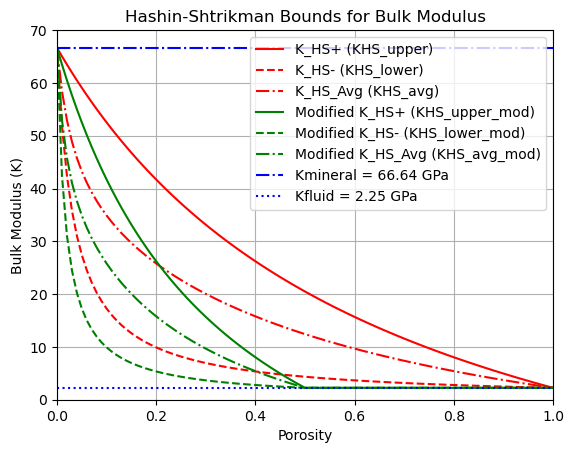

In [64]:
# Plotting the Hashin-Shtrikman bounds for bulk modulus
plt.plot(porosities, KHS_upper, label='K_HS+ (KHS_upper)', linestyle='-', color='red')
plt.plot(porosities, KHS_lower, label='K_HS- (KHS_lower)', linestyle='--', color='red')
plt.plot(porosities, KHS_avg, label='K_HS_Avg (KHS_avg)', linestyle='-.', color='red')
plt.plot(porosities, KHS_upper_mod, label='Modified K_HS+ (KHS_upper_mod)', linestyle='-', color='green')
plt.plot(porosities, KHS_lower_mod, label='Modified K_HS- (KHS_lower_mod)', linestyle='--', color='green')
plt.plot(porosities, KHS_avg_mod, label='Modified K_HS_Avg (KHS_avg_mod)', linestyle='-.', color='green')

plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')

# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Hashin-Shtrikman Bounds for Bulk Modulus')
plt.legend()
plt.grid(True)
plt.show()

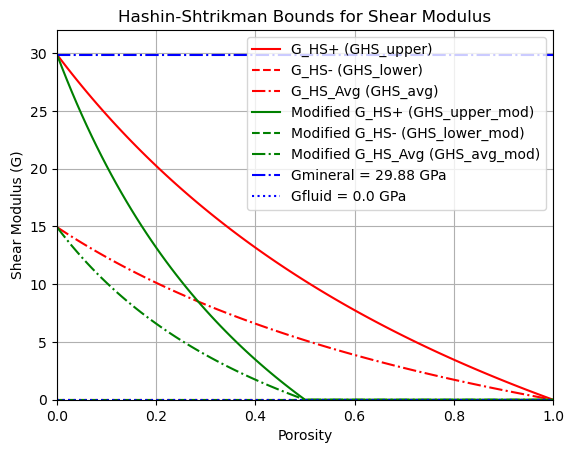

In [65]:
# Plotting the Hashin-Shtrikman bounds for shear modulus
plt.plot(porosities, GHS_upper, label='G_HS+ (GHS_upper)', linestyle='-', color='red')
plt.plot(porosities, GHS_lower, label='G_HS- (GHS_lower)', linestyle='--', color='red')
plt.plot(porosities, GHS_avg, label='G_HS_Avg (GHS_avg)', linestyle='-.', color='red')
plt.plot(porosities, GHS_upper_mod, label='Modified G_HS+ (GHS_upper_mod)', linestyle='-', color='green')
plt.plot(porosities, GHS_lower_mod, label='Modified G_HS- (GHS_lower_mod)', linestyle='--', color='green')
plt.plot(porosities, GHS_avg_mod, label='Modified G_HS_Avg (GHS_avg_mod)', linestyle='-.', color='green')

plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlim(0, 1)
plt.ylim(0, 32)
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Hashin-Shtrikman Bounds for Shear Modulus')
plt.legend()
plt.grid(True)
plt.show()

### Ques 13
Make a cross plot between measured saturated and Gassmann saturated values of compressive- and shear-wave velocities

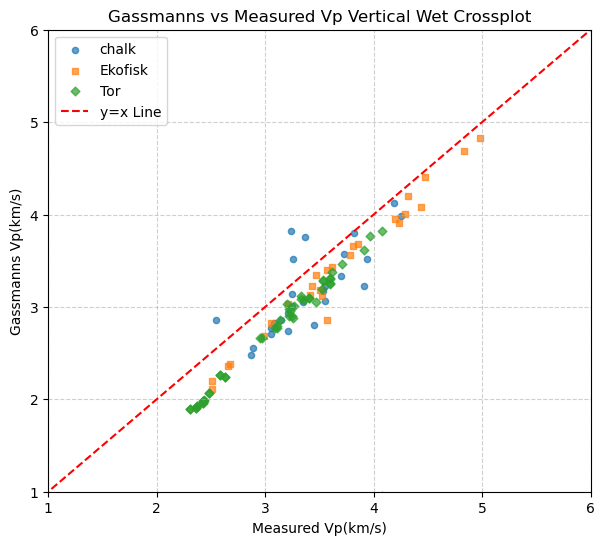

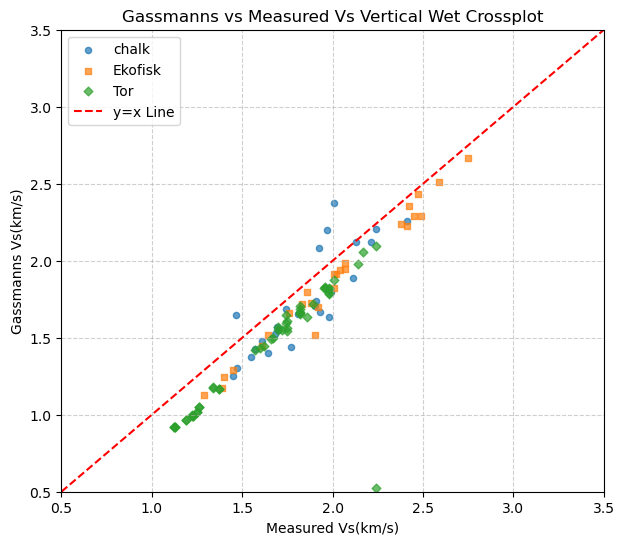

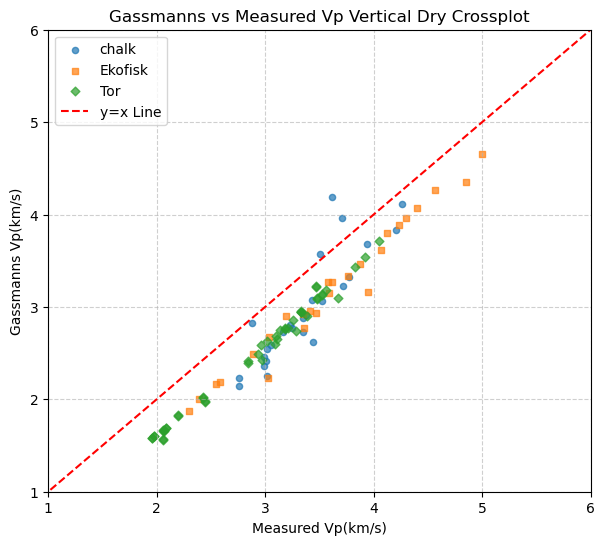

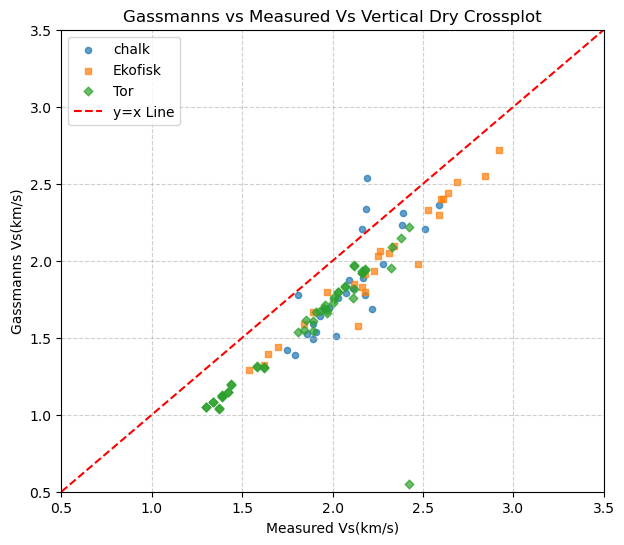

In [66]:
crossplot(Vp_vertical_wet,
        Vp_vertical_wet_Gassmanns,
        'Gassmanns vs Measured Vp Vertical Wet Crossplot',
        'Measured Vp(km/s)',
        'Gassmanns Vp(km/s)',
        xlimit = (1,6),
        ylimit = (1,6),
)
crossplot(Vs_vertical_wet,
        Vs_vertical_wet_Gassmanns,
        'Gassmanns vs Measured Vs Vertical Wet Crossplot',
        'Measured Vs(km/s)',
        'Gassmanns Vs(km/s)',
        xlimit = (0.5,3.5),
        ylimit = (0.5,3.5),
)
crossplot(Vp_vertical_dry,
        Vp_vertical_dry_Gassmanns,
        'Gassmanns vs Measured Vp Vertical Dry Crossplot',
        'Measured Vp(km/s)',
        'Gassmanns Vp(km/s)',
        xlimit = (1,6),
        ylimit = (1,6),
)
crossplot(Vs_vertical_dry,
        Vs_vertical_dry_Gassmanns,
        'Gassmanns vs Measured Vs Vertical Dry Crossplot',
        'Measured Vs(km/s)',
        'Gassmanns Vs(km/s)',
        xlimit = (0.5,3.5),
        ylimit = (0.5,3.5),
)

### Ques 14
Plot the given core data on the bounds template for bulk and shear moduli and comment on the condition of the reservoir formations/samples

In [67]:
# 75% KHS+ and 25% KHS-
KHS_75_25_mod = 0.75*KHS_upper_mod + 0.25*KHS_lower_mod
GHS_75_25_mod = 0.75*GHS_upper_mod + 0.25*GHS_lower_mod

# 25% KHS+ and 75% KHS-
KHS_25_75_mod = 0.25*KHS_upper_mod + 0.75*KHS_lower_mod
GHS_25_75_mod = 0.25*GHS_upper_mod + 0.75*GHS_lower_mod

In [68]:
# Define unique formations and assign markers and colors
formations = df['Formation'].unique()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'X', 'd']
colors = plt.cm.tab10.colors  # Use a colormap for colors

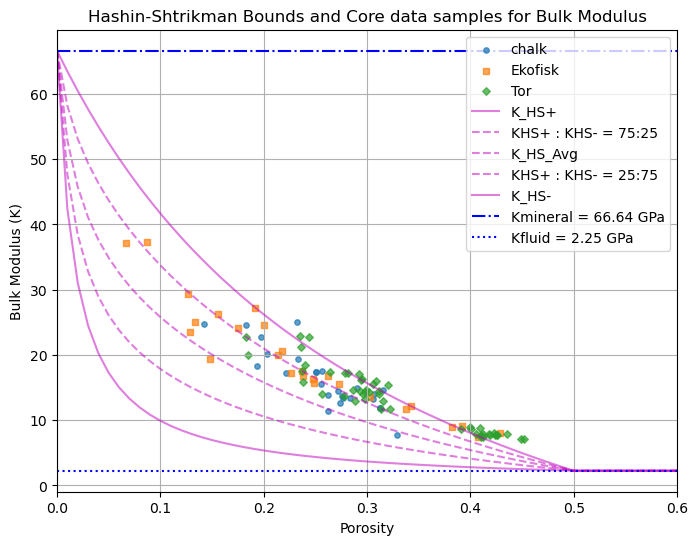

In [69]:
# Plotting the Hashin-Shtrikman bounds for bulk modulus

plt.figure(figsize=(8, 6))

# Plot each formation with a unique marker and color
for i, formation in enumerate(formations):
    formation_indices = df['Formation'] == formation
    plt.scatter(
        Porosity_calculated[formation_indices]/100,
        Bulk_modulus_saturated_calculated[formation_indices],
        label=formation,
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        alpha=0.7,
        s=15
    )

plt.plot(porosities, KHS_upper_mod, label='K_HS+', linestyle='-', alpha=0.5, color='m')
plt.plot(porosities, KHS_75_25_mod, label='KHS+ : KHS- = 75:25', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, KHS_avg_mod, label='K_HS_Avg', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, KHS_25_75_mod, label='KHS+ : KHS- = 25:75', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, KHS_lower_mod, label='K_HS- ', linestyle='-', alpha=0.5, color='m')


plt.axhline(y=Kmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Kmineral = {Kmin} GPa')
plt.axhline(y=Kfl, color='blue', linestyle=':', linewidth=1.5, label=f'Kfluid = {Kfl} GPa')

# Adding labels, title, and legend
plt.xlim(0, 0.6)
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (K)')
plt.title('Hashin-Shtrikman Bounds and Core data samples for Bulk Modulus')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

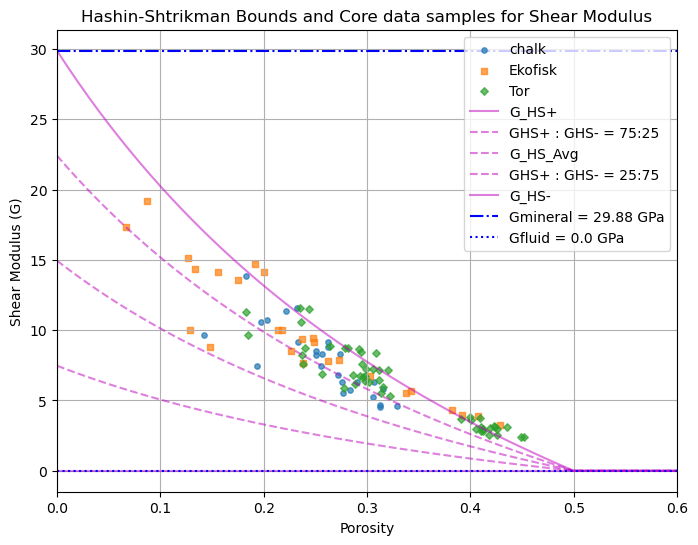

In [70]:
# Plotting the Hashin-Shtrikman bounds and Core data samples for Shear modulus

plt.figure(figsize=(8, 6))

# Plot each formation with a unique marker and color
for i, formation in enumerate(formations):
    formation_indices = df['Formation'] == formation
    plt.scatter(
        Porosity_calculated[formation_indices]/100,
        Shear_modulus_saturated_calculated[formation_indices],
        label=formation,
        marker=markers[i % len(markers)],
        color=colors[i % len(colors)],
        alpha=0.7,
        s=15
    )
    
plt.plot(porosities, GHS_upper_mod, label='G_HS+', linestyle='-', alpha=0.5, color='m')
plt.plot(porosities, GHS_75_25_mod, label='GHS+ : GHS- = 75:25', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, GHS_avg_mod, label='G_HS_Avg', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, GHS_25_75_mod, label='GHS+ : GHS- = 25:75', linestyle='--', alpha=0.5, color='m')
plt.plot(porosities, GHS_lower_mod, label='G_HS-', linestyle='-', alpha=0.5, color='m')

plt.axhline(y=Gmin, color='blue', linestyle='-.', linewidth=1.5, label=f'Gmineral = {Gmin} GPa')
plt.axhline(y=Gfl, color='blue', linestyle=':', linewidth=1.5, label=f'Gfluid = {Gfl} GPa')

# Adding labels, title, and legend
plt.xlabel('Porosity')
plt.ylabel('Shear Modulus (G)')
plt.title('Hashin-Shtrikman Bounds and Core data samples for Shear Modulus')
plt.xlim(0, 0.6)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

### Ques 15
Plot Histograms of Porosities for different formations

In [71]:
def plotHistogram(data, property_name, formation_name=None, xlimit=None, binsize=None):
    """
    Plot a histogram for a given property along with a Gaussian distribution, mean, and standard deviations.

    Parameters:
    - data: The data to plot (numpy array or pandas series)
    - property_name: The name of the property being plotted (string)
    - formation_name: The name of the formation (optional, string)
    - xlimit: Tuple specifying the x-axis limits (optional)
    - binsize: The size of the bins for the histogram (optional)
    """

    data = data[df['Formation'] == formation_name] if formation_name else data

    plt.figure(figsize=(10, 6))
    
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    # Set the number of bins
    if binsize:
        bins = np.arange(min(data), max(data) + binsize, binsize)
    else:
        bins = 20  # Default number of bins

    # Plot the histogram
    counts, bins, patches = plt.hist(data, bins=bins, color='blue', alpha=0.6, edgecolor='black', density=True, label='Histogram')

    # Plot the Gaussian distribution
    if xlimit:
        x = np.linspace(xlimit[0], xlimit[1], 1000)
    else:
        x = np.linspace(min(data), max(data), 1000)
    gaussian = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    plt.plot(x, gaussian, color='red', linestyle='-', label='Gaussian Fit')

    # Plot mean and standard deviations
    plt.axvline(mean, color='m', linestyle='--', linewidth=1.5, label=f'Mean = {mean:.2f}')
    plt.axvline(mean - std, color='orange', linestyle='--', linewidth=1.5, label=f'Std dev = {std:.2f}')
    plt.axvline(mean + std, color='orange', linestyle='--', linewidth=1.5, )

    # Set x-axis limits if provided
    if xlimit:
        plt.xlim(xlimit)

    # Add labels, title, legend, and grid
    plt.xlabel(f'{property_name}')
    plt.ylabel('Density')
    title = f'Histogram of {property_name}'
    if formation_name:
        title += f' for {formation_name}'
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

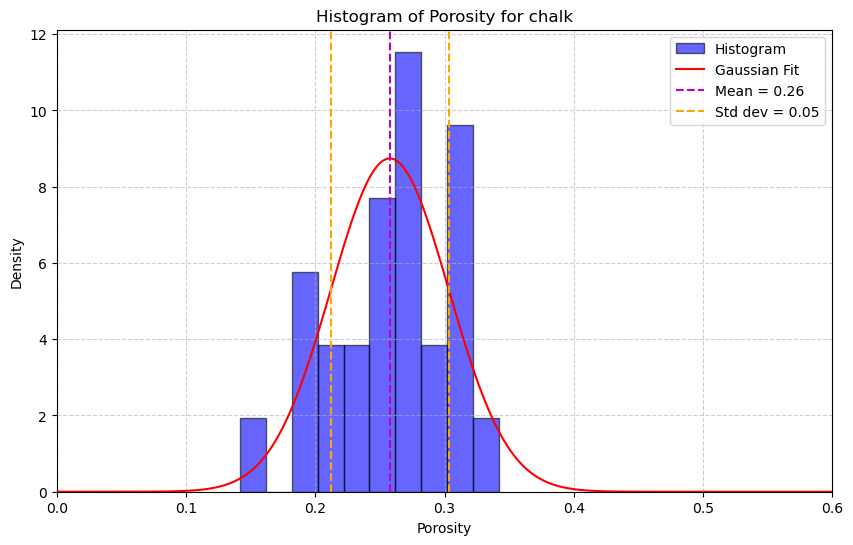

In [72]:
plotHistogram(
    Porosity_calculated/100,  # Pass the column name as a string
    'Porosity',
    formation_name='chalk',
    xlimit=(0, 0.6),
    binsize=0.02
)

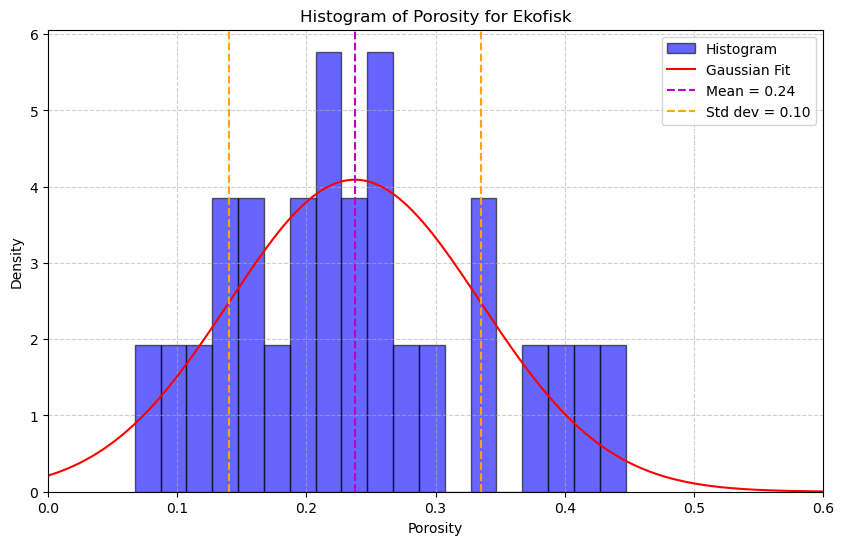

In [73]:
plotHistogram(
    Porosity_calculated/100,  # Pass the column name as a string
    'Porosity',
    formation_name='Ekofisk',
    xlimit=(0, 0.6),
    binsize=0.02
)

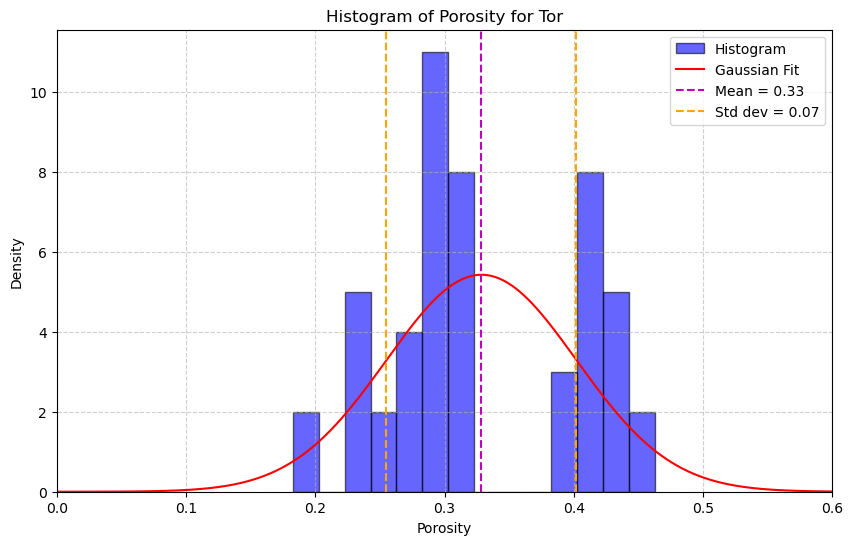

In [74]:
plotHistogram(
    Porosity_calculated/100,  # Pass the column name as a string
    'Porosity',
    formation_name='Tor',
    xlimit=(0, 0.6),
    binsize=0.02
)

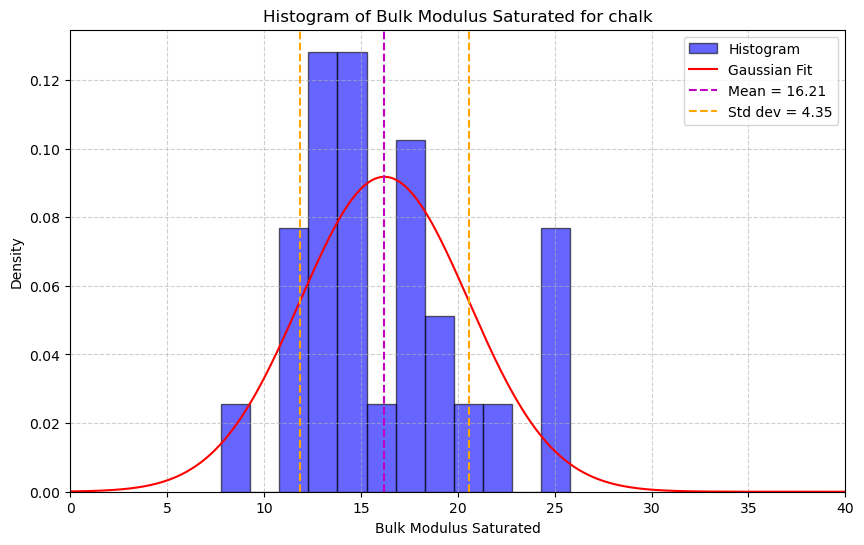

In [75]:
plotHistogram(
    Bulk_modulus_saturated_calculated,
    'Bulk Modulus Saturated',
    formation_name='chalk',
    xlimit=(0, 40),
    binsize=1.5
)

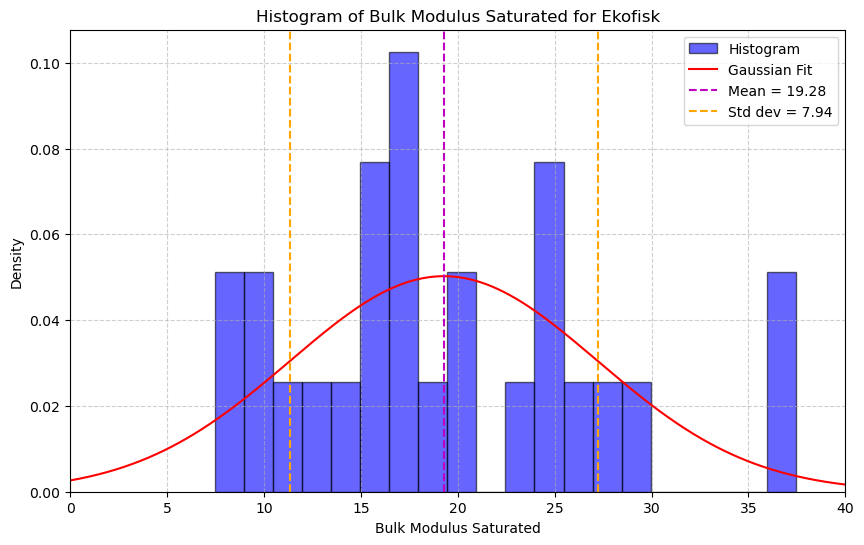

In [76]:
plotHistogram(
    Bulk_modulus_saturated_calculated,
    'Bulk Modulus Saturated',
    formation_name='Ekofisk',
    xlimit=(0, 40),
    binsize=1.5
)

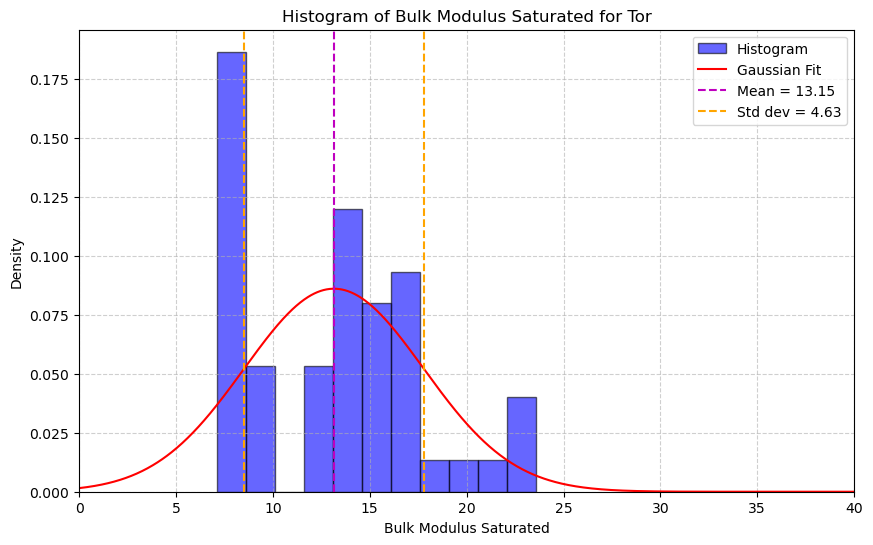

In [77]:
plotHistogram(
    Bulk_modulus_saturated_calculated,
    'Bulk Modulus Saturated',
    formation_name='Tor',
    xlimit=(0, 40),
    binsize=1.5
)

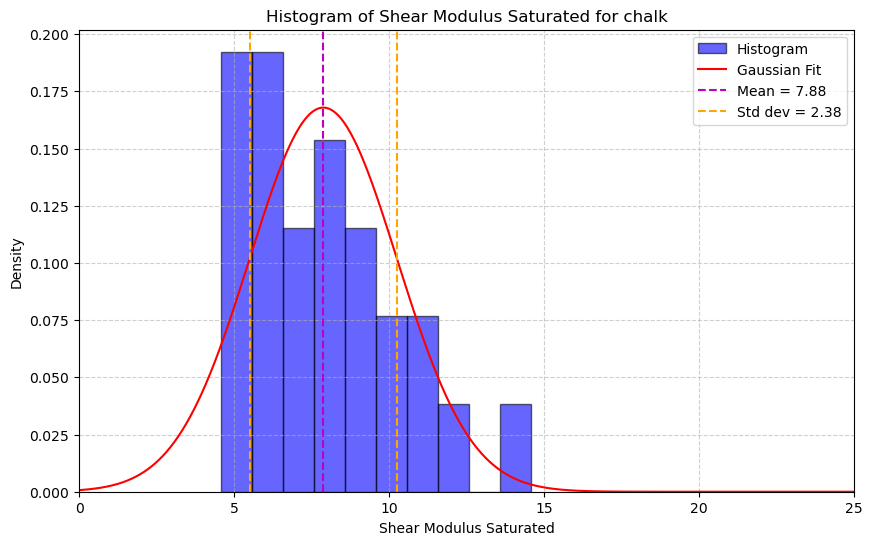

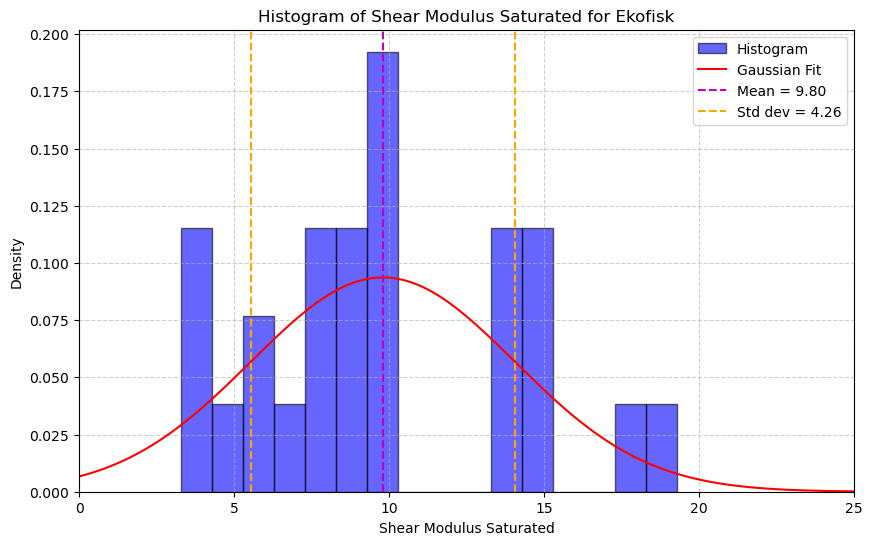

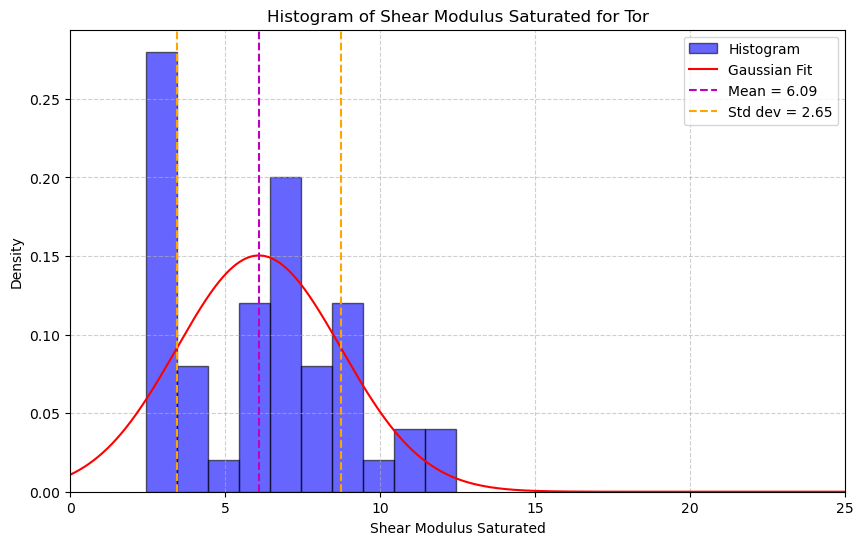

In [78]:
plotHistogram(
    Shear_modulus_saturated_calculated,
    'Shear Modulus Saturated',
    formation_name='chalk',
    xlimit=(0, 25),
    binsize=1
)
plotHistogram(
    Shear_modulus_saturated_calculated,
    'Shear Modulus Saturated',
    formation_name='Ekofisk',
    xlimit=(0, 25),
    binsize=1
)
plotHistogram(
    Shear_modulus_saturated_calculated,
    'Shear Modulus Saturated',
    formation_name='Tor',
    xlimit=(0, 25),
    binsize=1
)


### Save Results in a CSV file

In [79]:
# show df_results columns
df_results.columns

Index(['Well', 'Formation', 'Depth', 'Bulk_density_dry',
       'Bulk_density_saturated', 'Vp_vertical_dry', 'Vp_vertical_saturated',
       'Vs_vertical_dry', 'Vs_vertical_saturated', 'Carbonate_content',
       'Quartz_content', 'Clay_content', 'Porosity_calculated',
       'Bulk_modulus_dry_calculated', 'Shear_modulus_dry_calculated',
       'Bulk_modulus_saturated_calculated',
       'Shear_modulus_saturated_calculated', 'Poisson_ratio_dry_calculated',
       'Poisson_ratio_saturated_calculated', 'Biots_coefficient_calculated',
       'Vertical_overburden_stress', 'Vertical_differential_stress',
       'Vertical_effective_stress', 'Bulk_modulus_saturated_Gassmanns',
       'Shear_modulus_saturated_Gassmanns', 'Bulk_modulus_dry_Gassmanns',
       'Shear_modulus_dry_Gassmanns', 'Vp_vertical_saturated_Gassmanns',
       'Vs_vertical_saturated_Gassmanns', 'Vp_vertical_dry_Gassmanns',
       'Vs_vertical_dry_Gassmanns'],
      dtype='object')

In [80]:
df_results = df_results.applymap(lambda x: round(x, 2) if isinstance(x, (float, int)) else x)

In [81]:
# Add a new row at the 0th index for units according to the columns
units = [
    '', '', 'ft', 'g/cc', 'g/cc', 'km/s', 'km/s', 'km/s', 'km/s', '%', '%', '%', '%',
    'GPa', 'GPa', 'GPa', 'GPa', '', '', '', 'psi', 'psi', 'psi', 'GPa', 'GPa', 'GPa', 'GPa',
    'km/s', 'km/s', 'km/s', 'km/s',
]
df_results.loc[-1] = units  # Add the units row
df_results.index = df_results.index + 1  # Shift the index
df_results.sort_index(inplace=True)  # Sort the index

In [82]:
df_results.head(10)

,Well,Formation,Depth,Bulk_density_dry,Bulk_density_saturated,Vp_vertical_dry,Vp_vertical_saturated,Vs_vertical_dry,Vs_vertical_saturated,Carbonate_content,...,Vertical_differential_stress,Vertical_effective_stress,Bulk_modulus_saturated_Gassmanns,Shear_modulus_saturated_Gassmanns,Bulk_modulus_dry_Gassmanns,Shear_modulus_dry_Gassmanns,Vp_vertical_saturated_Gassmanns,Vs_vertical_saturated_Gassmanns,Vp_vertical_dry_Gassmanns,Vs_vertical_dry_Gassmanns
0,,,ft,g/cc,g/cc,km/s,km/s,km/s,km/s,%,...,psi,psi,GPa,GPa,GPa,GPa,km/s,km/s,km/s,km/s
2,Nana,chalk,6918.97,1.93,2.23,3.05,3.15,1.93,1.68,84.0,...,2995.92,4337.31,11.33,5.19,6.04,5.19,2.86,1.53,2.59,1.64
3,Nana,chalk,6922.91,1.83,2.14,2.88,2.55,1.81,1.47,87.4,...,2998.01,4024.9,9.82,5.79,6.93,5.79,2.86,1.64,2.83,1.78
4,Nana,chalk,6922.91,1.83,2.17,2.76,2.89,1.75,1.47,87.92,...,2998.01,4121.82,9.31,3.68,4.24,3.68,2.56,1.3,2.24,1.42
5,Nana,chalk,6948.5,1.99,2.24,3.35,3.25,2.08,1.74,93.3,...,3010.98,4381.79,13.64,6.36,8.05,6.36,3.14,1.68,2.88,1.79
6,Nana,chalk,6948.5,2.0,2.27,3.23,3.35,2.03,1.81,93.96,...,3010.98,4483.75,12.96,6.2,7.43,6.2,3.06,1.65,2.8,1.76
7,Nana,chalk,6958.67,1.92,2.22,3.02,3.08,1.89,1.61,91.04,...,3016.57,4318.72,11.3,4.86,5.92,4.86,2.83,1.48,2.54,1.59
8,Nana,chalk,6973.11,1.85,2.18,3.16,3.21,1.95,1.7,86.12,...,3024.2,4193.79,11.72,5.25,6.79,5.25,2.93,1.55,2.73,1.68
9,Nana,chalk,6978.03,2.16,2.37,3.02,3.45,2.02,1.77,85.71,...,3026.71,4876.57,12.12,4.91,4.43,4.91,2.81,1.44,2.25,1.51
10,Nana,chalk,6987.55,2.3,2.46,3.44,3.91,2.22,1.98,88.26,...,3032.36,5199.59,16.83,6.56,7.0,6.56,3.22,1.63,2.62,1.69


In [83]:
# replace depth values having 0 with NaN
df_results['Depth'] = df_results['Depth'].replace(0, np.nan)

In [84]:
# save df_results to csv and excel
# df_results.to_csv('ChalkData_ClassTutorial_results.csv', index=False)
# df_results.to_excel('ChalkData_ClassTutorial_results.xlsx', index=False)

In [85]:
# ! jupyter nbconvert --to script chalk_data_analysis.ipynb